In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.lr = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # insert bias input 1 at position 0
        weighted_sum = np.dot(self.weights, x)
        return self.activation(weighted_sum)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # add bias input
                prediction = self.activation(np.dot(self.weights, x_i))
                self.weights += self.lr * (y[i] - prediction) * x_i

# Input and output for AND gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

# Input and output for OR gate
y_or = np.array([0, 1, 1, 1])

print("Training Perceptron for AND gate:")
p_and = Perceptron(input_size=2)
p_and.train(X, y_and)
for x in X:
    print(f"Input: {x}, Output: {p_and.predict(x)}")

print("\nTraining Perceptron for OR gate:")
p_or = Perceptron(input_size=2)
p_or.train(X, y_or)
for x in X:
    print(f"Input: {x}, Output: {p_or.predict(x)}")


Training Perceptron for AND gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1

Training Perceptron for OR gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



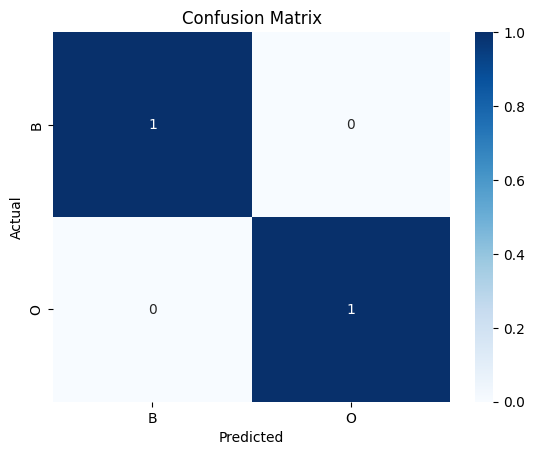

In [7]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('crab.csv')  # Make sure the file is not empty

# Encode categorical features
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # M = 1, F = 0
df['sp'] = LabelEncoder().fit_transform(df['sp'])    # B = 0, O = 1

# Features and label
X = df[['FL', 'RW', 'CL', 'CW', 'BD']]
y = df['sp']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train MLP (PatternNet style)
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'O'], yticklabels=['B', 'O'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



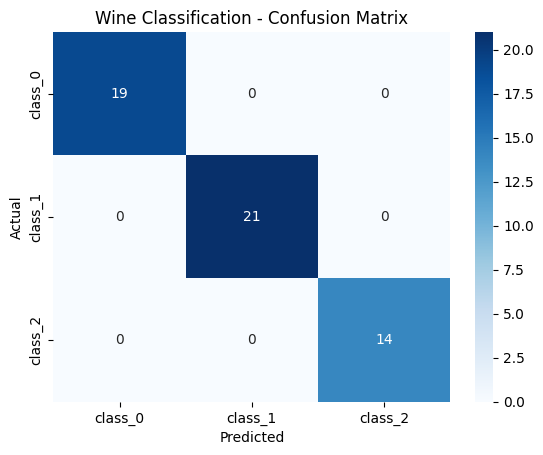

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
target_names = data.target_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model (with backpropagation)
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Wine Classification - Confusion Matrix")
plt.show()


In [10]:
import torch
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  
        return self.fc2(x)

model = Net()


x = torch.tensor([[1.0, 2.0]], requires_grad=True)


output = model(x)


def compute_jacobian(output, input):
    jacobian = []
    for i in range(output.shape[1] if output.ndim > 1 else 1):
        grad_output = torch.zeros_like(output)
        if output.ndim > 1:
            grad_output[0, i] = 1.0
        else:
            grad_output[0] = 1.0
        grad = torch.autograd.grad(outputs=output, inputs=input,
                                   grad_outputs=grad_output,
                                   retain_graph=True, create_graph=True)[0]
        jacobian.append(grad)
    return torch.stack(jacobian)

jacobian = compute_jacobian(output, x)
print("Jacobian:\n", jacobian.squeeze())


def compute_hessian(output, input):
    jac = torch.autograd.grad(output, input, create_graph=True)[0]
    hessian_rows = []
    for i in range(input.numel()):
        grad2 = torch.autograd.grad(jac[0, i], input, retain_graph=True)[0]
        hessian_rows.append(grad2[0])
    return torch.stack(hessian_rows)

hessian = compute_hessian(output, x)
print("Hessian:\n", hessian)



Jacobian:
 tensor([0.1696, 0.0187], grad_fn=<SqueezeBackward0>)
Hessian:
 tensor([[-0.0724, -0.0289],
        [-0.0289, -0.0651]])
